In [33]:
#Lag en modell som predikerer tilsvarende XOR-Operatoren.
#Før du optimaliserer denne modellen må du initialisere modellvariablene med tilfeldige tall, for eksempel mellom -1 og 1.
#Visualiser både når modellen konvergerer og ikke konvergerer mot en riktig modell.

In [34]:
import torch
import numpy as np
import matplotlib.pyplot as plt

In [35]:
x_train = torch.tensor([[0.0, 0.0], [0.0, 1.0], [1.0, 0.0], [1.0, 1.0]]).reshape(-1, 2)
y_train = torch.tensor([[0.0], [1.0], [1.0], [0.0]]).reshape(-1, 1)

W1_init = torch.tensor([[10.0, -10.0], [10.0, -10.0]])
b1_init = torch.tensor([[-5.0, 15.0]])
W2_init = torch.tensor([[10.0], [10.0]])
b2_init = torch.tensor([[-15.0]])


In [36]:
torch.logical_xor(x_train[:, 0].reshape(-1, 1), x_train[:, 1].reshape(-1, 1)) #EZ Plays

tensor([[False],
        [ True],
        [ True],
        [False]])

In [37]:
class XORoperator:
    def __init__(self, W1=W1_init.clone(), W2=W2_init.clone(), b1=b1_init.clone(), b2=b2_init.clone()):
        self.W1 = torch.tensor(W1,requires_grad=True)
        self.W2 = torch.tensor(W2,requires_grad=True)
        self.b1 = torch.tensor(b1,requires_grad=True)
        self.b2 = torch.tensor(b2,requires_grad=True)


    # First layer function
    def f1(self, x):
        return torch.sigmoid(x @ self.W1 + self.b1)

    # Second layer function
    def f2(self, h):
        return torch.sigmoid(h @ self.W2 + self.b2)

    # Predictor
    def f(self, x):
        return self.f2(self.f1(x))

    # Uses Cross Entropy
    def loss(self, x, y):
        return torch.nn.functional.binary_cross_entropy(self.f(x), y)


model = XORoperator()

<ipython-input-37-ae0d5a2be71a>:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.W1 = torch.tensor(W1,requires_grad=True)
<ipython-input-37-ae0d5a2be71a>:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.W2 = torch.tensor(W2,requires_grad=True)
<ipython-input-37-ae0d5a2be71a>:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.b1 = torch.tensor(b1,requires_grad=True)
<ipython-input-37-ae0d5a2be71a>:6: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().det

In [38]:
optimizer = torch.optim.SGD([model.b1, model.b2, model.W1, model.W2], 0.1)
for epoch in range(10000):
    model.loss(x_train, y_train).backward()  # Compute loss gradients
    optimizer.step()  # Perform optimization by adjusting W and b
    optimizer.zero_grad()  # Clear gradients for next step

print(f'W1 = {model.W1}, W2 = {model.W2}, b1 = {model.b1}, b2 = {model.b2}, loss = {model.loss(x_train.reshape(-1, 2), y_train)}')

W1 = tensor([[ 15.0000, -10.0365],
        [ 10.0875, -10.0309]], requires_grad=True), W2 = tensor([[10.7642],
        [10.7609]], requires_grad=True), b1 = tensor([[-5.0301, 15.0526]], requires_grad=True), b2 = tensor([[-15.9500]], requires_grad=True), loss = 0.005090093705803156


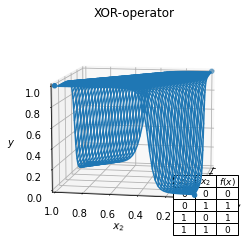

In [39]:
fig = plt.figure('Oppgave C')
ax = fig.gca(projection='3d')
plt.title('XOR-operator')
# set axes limits, labels and create a table of the XOR
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_zlim(0, 1)
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$y$')
plt.table(cellText=[[0, 0, 0], [0, 1, 1], [1, 0, 1], [1, 1, 0]],
          colWidths=[0.1] * 3,
          colLabels=["$x_1$", "$x_2$", "$f(x)$"],
          cellLoc="center",
          loc="lower right")

x1 = np.arange(0, 1, 0.02)  # Set x1-values on the grid
x2 = np.arange(0, 1, 0.02)  # Set x2-values on the grid
# Calculate y-axis values
y = np.empty([len(x1), len(x2)], dtype=np.double)
for t in range(len(x1)):
    for r in range(len(x2)):
        y[t, r] = float(model.f(torch.tensor([float(x1[t]), float(x2[r])])))

x1, x2 = np.meshgrid(x1, x2)  # Create meshgrid
surf = ax.plot_wireframe(x1, x2, np.array(y))  # Plots the wireframe

# Scatter/plot the points for f(x1, x2) in x_train
xer = [float(x[0]) for x in x_train]
yer = [float(x[1]) for x in x_train]
ax.scatter(xer, yer, y_train)

float(model.f(torch.tensor([1.0, 0.0])))

# Customize the view angle so it's easier to see that the scatter points lie
# on the plane y=0
ax.view_init(elev=10, azim=-170)

plt.show()